# Module 3 - Unsupervised Learning miniproject
## FitBit dataset
https://www.kaggle.com/singhakash/fitbit-dataset?select=FitBit+data.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [65]:
df = pd.read_csv('FitBit data project.csv')
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [66]:
# set_index to 'Id':

df.set_index('Id', inplace=True)

In [67]:
df.head()

,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,,,,,,,,,,,,,,
1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


### Inspect the Data:
Multicollinearity?
Missing values?
Data Types?

In [68]:
# data types?

df.dtypes 

# set id to index; potentially drop activity date

ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [69]:
# Missing values?:

df.isna().sum()

ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

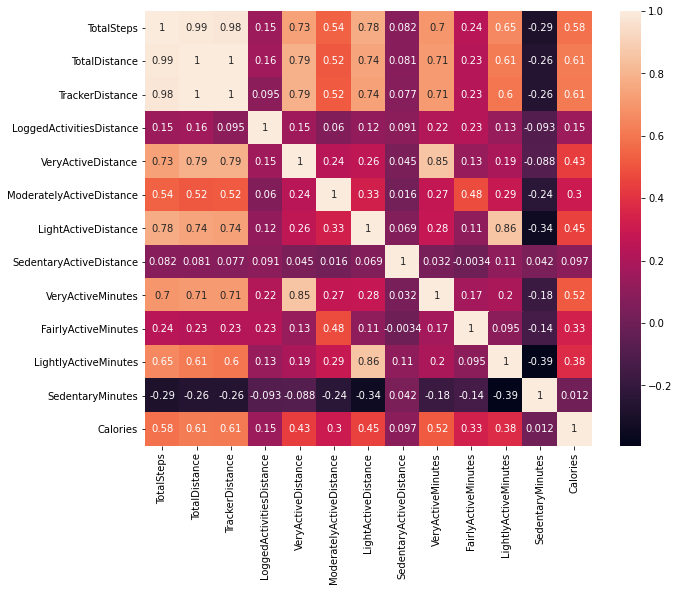

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

# drop either TotalSteps or TotalDistance or TrackerDistance (keep TotalDistance and drop steps and tracker)

In [71]:
# drop columns for multicollinearity
df.drop(['TotalSteps', 'TrackerDistance'], axis=1, inplace=True)

In [72]:
# drop unneccesary columns:
df.drop('ActivityDate', axis=1, inplace=True)

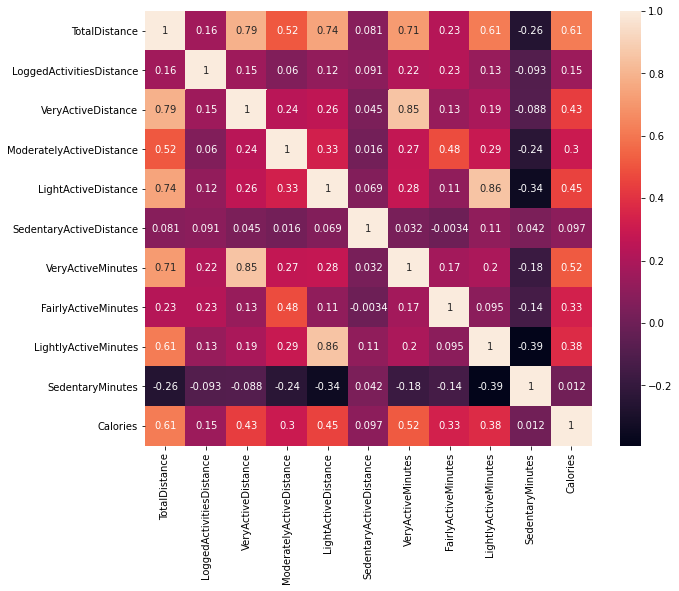

In [73]:
# check correlation matrix after dropping the columns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

##### Before standardizing the data, try running a clustering algorithm on the data as is, just to evaluate at the end how it compares to the standardized data.

In [74]:
from sklearn.cluster import KMeans

In [75]:
# initialize the pre-standardized model:

fitbit_model = KMeans(n_clusters=2)

fitbit_model.fit(df)

KMeans(n_clusters=2)

In [76]:
df['ClusterLabels'] = fitbit_model.labels_
df['ClusterLabels'].value_counts()

0    304
1    153
Name: ClusterLabels, dtype: int64

In [77]:
df.groupby('ClusterLabels').mean()

# feature pairs to plot (with distinct "clusters"): 
# TotalDistance/VeryActiveDistance/LightActiveDistance/VeryActiveMinutes/FairlyActiveMinutes/LightlyActiveMinutes/SedentaryMinutes/Calories

# or maybe this means we need to re-visit the heatmap and figure out things with 0.86 corr (ActiveDistance and ActiveMinutes)

# Try to plot LightlyActiveMinutes on X and ...
# calories against fairlyactive minutes
# calories against totaldistance
# sedentaryactivedistance against calories

,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
ClusterLabels,,,,,,,,,,,
0,3.234836,0.081803,0.561974,0.36773,2.295789,0.001480,8.180921,7.730263,145.529605,1010.203947,1737.177632
1,7.502222,0.373399,2.410654,0.69902,4.071242,0.002745,33.398693,23.679739,218.830065,965.633987,3088.091503


[362843528.41170406, 176261808.34696472, 118480995.09478566, 84566161.50524428, 63425898.59041327, 53704231.67265763, 46953961.54179739, 40693256.38042819]


Text(0.5, 1.0, 'Elbow Plot for Optimal K Clusters')

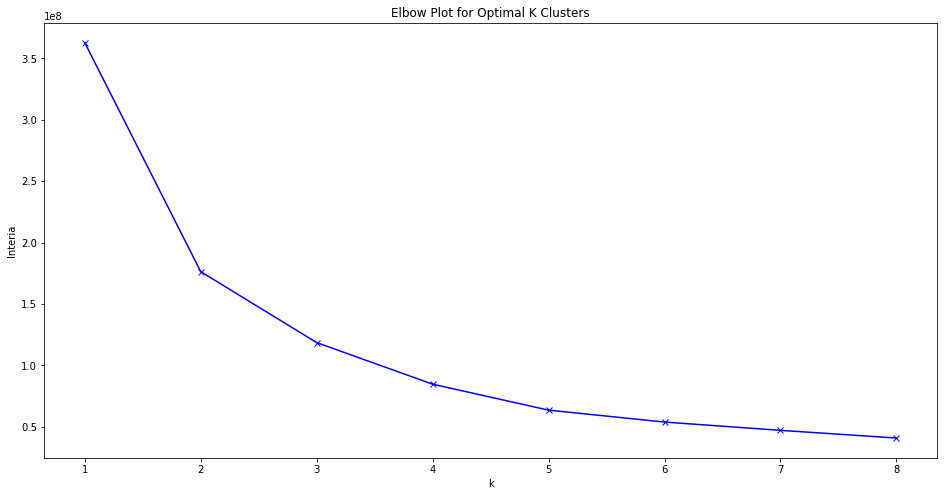

In [78]:
# Make elbow plot to find optimal n_clusters:
K = range(1,9)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                   random_state=1234)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    
print(inertia)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel("k")
plt.ylabel('Interia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title("Elbow Plot for Optimal K Clusters")

In [ ]:
# looks like optimal number of clusters is 2 (or 3 ?!).

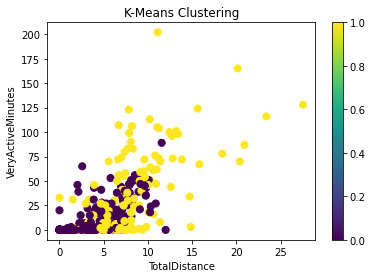

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['TotalDistance'],df['VeryActiveMinutes'],
                     c=df['ClusterLabels'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('TotalDistance')
ax.set_ylabel('VeryActiveMinutes')
plt.colorbar(scatter)

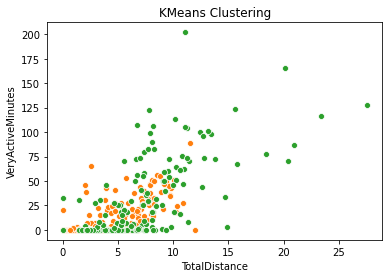

In [80]:
for cluster in clusterval:
    sns.scatterplot(x = df[df['ClusterLabels']==cluster]['TotalDistance'], y = df[df['ClusterLabels']==cluster]['VeryActiveMinutes'])
plt.xlabel('TotalDistance')
plt.ylabel('VeryActiveMinutes')
plt.title('KMeans Clustering')
plt.show()

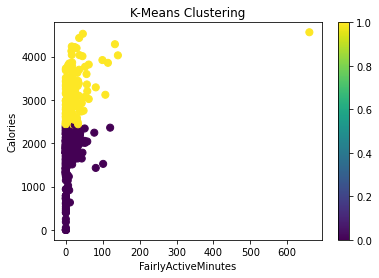

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['FairlyActiveMinutes'],df['Calories'],
                     c=df['ClusterLabels'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('FairlyActiveMinutes')
ax.set_ylabel('Calories')
plt.colorbar(scatter)

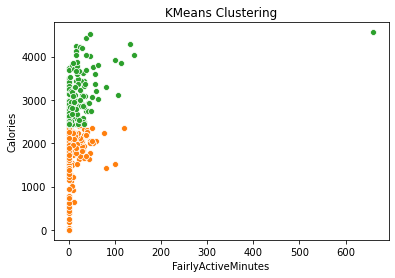

In [84]:
for cluster in clusterval:
    sns.scatterplot(x = df[df['ClusterLabels']==cluster]['FairlyActiveMinutes'], y = df[df['ClusterLabels']==cluster]['Calories'])
plt.xlabel('FairlyActiveMinutes')
plt.ylabel('Calories')
plt.title('KMeans Clustering')
plt.show()

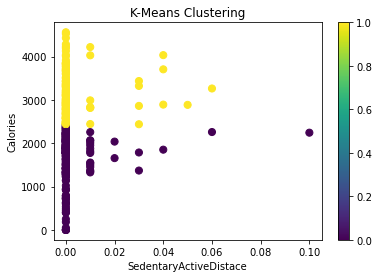

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['SedentaryActiveDistance'],df['Calories'],
                     c=df['ClusterLabels'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('SedentaryActiveDistace')
ax.set_ylabel('Calories')
plt.colorbar(scatter)

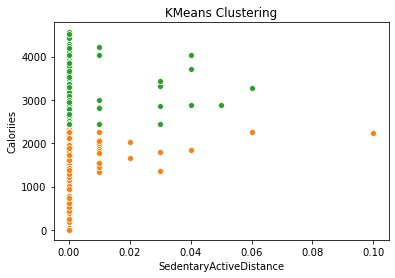

In [85]:
for cluster in clusterval:
    sns.scatterplot(x = df[df['ClusterLabels']==cluster]['SedentaryActiveDistance'], y = df[df['ClusterLabels']==cluster]['Calories'])
plt.xlabel('SedentaryActiveDistance')
plt.ylabel('Caloriies')
plt.title('KMeans Clustering')
plt.show()

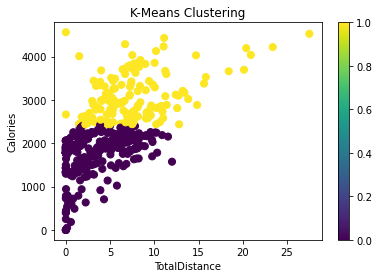

In [22]:
# Try TotalDistance/VeryActiveMinutes against Calories?
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df['TotalDistance'],df['Calories'],
                     c=df['ClusterLabels'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('TotalDistance')
ax.set_ylabel('Calories')
plt.colorbar(scatter)

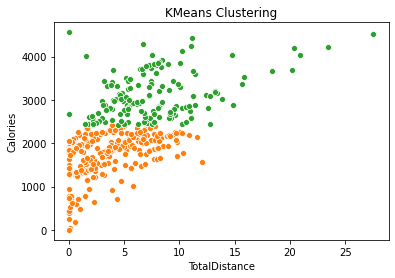

In [86]:
for cluster in clusterval:
    sns.scatterplot(x = df[df['ClusterLabels']==cluster]['TotalDistance'], y = df[df['ClusterLabels']==cluster]['Calories'])
plt.xlabel('TotalDistance')
plt.ylabel('Calories')
plt.title('KMeans Clustering')
plt.show()

In [ ]:
# To do still: 

# Try standardizing the data and see how it goes. 
# Take inertia score of n_clusters=2 vs. other values
# groupby('ClusterLabels').mean() to see which values could be plotted against each other to show distinct clusters

### Standardize the data and re-cluster:

In [87]:
df.describe()

,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ClusterLabels
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.663523,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954,0.334792
std,4.082072,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523,0.472435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000,0.000000
25%,1.410000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000,0.000000
50%,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000,0.000000
75%,7.160000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000,1.000000
max,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000,1.000000


In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
standardize = StandardScaler().fit_transform(df)

In [90]:
df_std = pd.DataFrame(standardize, columns = df.columns)
df_std.head()
round(df_std.describe(),5)

,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ClusterLabels
count,457.00000,457.00000,457.00000,457.00000,457.00000,457.00000,457.00000,457.00000,457.00000,457.00000,457.00000,457.00000
mean,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000
std,1.00110,1.00110,1.00110,1.00110,1.00110,1.00110,1.00110,1.00110,1.00110,1.00110,1.00110,1.00110
min,-1.14369,-0.21151,-0.47532,-0.57662,-1.29311,-0.22456,-0.57545,-0.36136,-1.39320,-2.86136,-2.68779,-0.70943
25%,-0.79790,-0.21151,-0.47532,-0.57662,-0.90386,-0.22456,-0.57545,-0.36136,-0.86892,-0.79394,-0.50756,-0.70943
50%,-0.14065,-0.21151,-0.47532,-0.55253,0.01781,-0.22456,-0.57545,-0.33371,0.08954,0.18333,-0.15646,-0.70943
75%,0.61224,-0.21151,0.05196,0.23053,0.70235,-0.22456,0.28996,0.08101,0.71212,0.86058,0.58624,1.40958
max,5.60782,7.71851,8.34761,7.13343,4.30402,11.57135,6.41706,17.88631,4.50498,1.32100,2.91256,1.40958


In [27]:
# initialize model post stdzn. 


fitbit_model_std = KMeans(n_clusters=2)

fitbit_model_std.fit(df_std)

KMeans(n_clusters=2)

In [91]:
df_std.drop('ClusterLabels', axis=1, inplace=True) # drop cluster labels from pre-stdzd model

In [92]:
df_std['Labels'] = fitbit_model_std.labels_
df_std['Labels'].value_counts()

0    252
1    205
Name: Labels, dtype: int64

[5140.041575492346, 3732.413247071865, 3167.6818279077315, 2815.319074850438, 2511.105678548904, 2192.8375373371628, 1945.5086408980826, 1661.813255749861]


Text(0.5, 1.0, 'Elbow Plot for Optimal K Clusters')

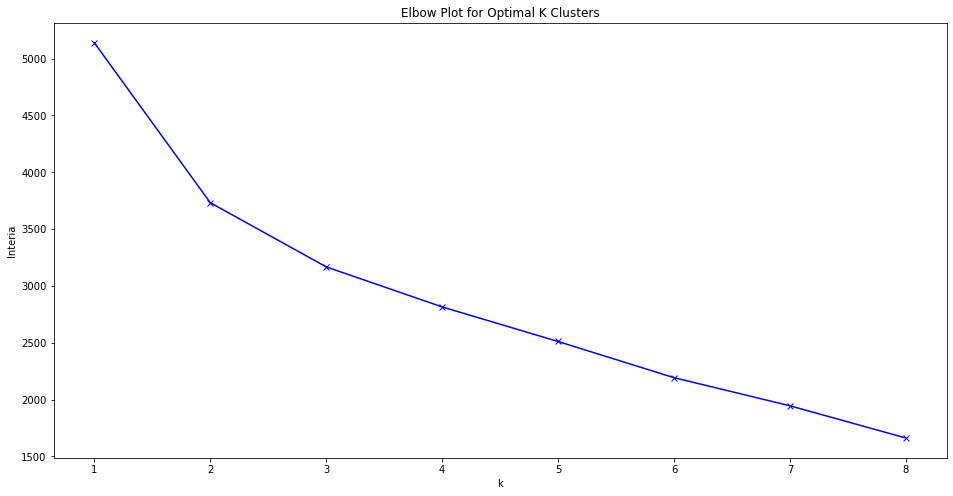

In [93]:
# New Elbow Plot:
K = range(1,9)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                   random_state=1234)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)
    
print(inertia)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel("k")
plt.ylabel('Interia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title("Elbow Plot for Optimal K Clusters")

[0 1]


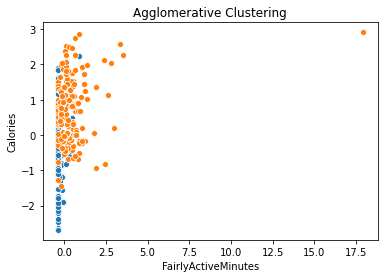

In [95]:
clusterval = np.unique(df_std['Labels'])
print(clusterval)
for cluster in clusterval:
    sns.scatterplot(x = df_std[df_std['Labels']==cluster]['FairlyActiveMinutes'], y = df_std[df_std['Labels']==cluster]['Calories'])
plt.title('Agglomerative Clustering')
plt.show()

[0 1]


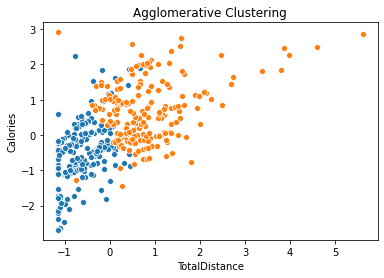

In [96]:
clusterval = np.unique(df_std['Labels'])
print(clusterval)
for cluster in clusterval:
    sns.scatterplot(x = df_std[df_std['Labels']==cluster]['TotalDistance'], y = df_std[df_std['Labels']==cluster]['Calories'])
plt.title('Agglomerative Clustering')
plt.show()

[0 1]


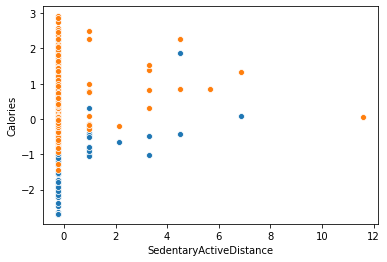

In [97]:
clusterval = np.unique(df_std['Labels'])
print(clusterval)
for cluster in clusterval:
    sns.scatterplot(x = df_std[df_std['Labels']==cluster]['SedentaryActiveDistance'], y = df_std[df_std['Labels']==cluster]['Calories'])
plt.show()

### DBSCAN:

In [98]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.4, min_samples=7) # distance (epsilon parameter) and neighborhood amount

In [99]:
# fit model and predict clusters

df_std['Labels_DBSCAN'] = model.fit_predict(df_std)

In [100]:
df_std.head()
# now we have columns for both labels (from KMeans and from DBSCAN).

,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Labels,Labels_DBSCAN
0,0.599979,-0.211514,0.559122,-0.022460,0.527859,-0.224561,0.566891,-0.029584,0.286143,-0.568189,-0.454771,1,-1
1,1.688854,-0.211514,2.310023,0.302808,0.456273,-0.224561,2.505409,0.108656,0.851385,-1.209800,-0.043522,1,-1
2,0.948223,-0.211514,1.400359,-0.383868,0.366790,-0.224561,1.363068,-0.223120,0.802234,-1.159303,-0.301320,1,-1
3,1.046320,-0.211514,0.808676,0.375090,0.921582,-0.224561,0.774589,0.191600,0.441790,0.251647,-0.316051,1,-1
4,0.781458,-0.211514,0.394095,0.736498,0.769461,-0.224561,0.393809,0.412784,0.597436,-0.689976,-0.372521,1,-1


In [48]:
# Drop the Labels column from KMeans
# df_std.drop('Labels', axis=1, inplace=True)

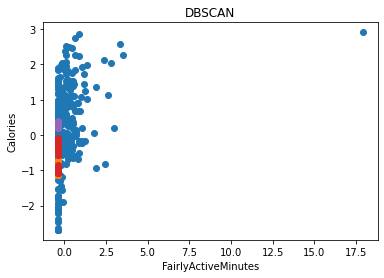

In [102]:
# create scatter plot for samples from each cluster

clusterval = df_std['Labels_DBSCAN'].unique()
for cluster in clusterval:
    plt.scatter(df_std[df_std['Labels_DBSCAN']==cluster]['FairlyActiveMinutes'], df_std[df_std['Labels_DBSCAN']==cluster]['Calories'])
plt.xlabel('FairlyActiveMinutes')
plt.ylabel('Calories') 
plt.title('DBSCAN')
plt.show()

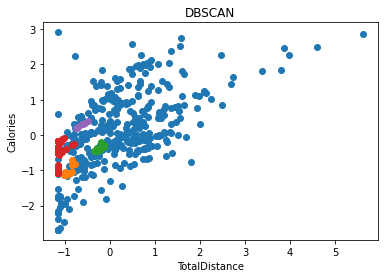

In [104]:
clusterval = df_std['Labels_DBSCAN'].unique()
for cluster in clusterval:
    plt.scatter(df_std[df_std['Labels_DBSCAN']==cluster]['TotalDistance'], df_std[df_std['Labels_DBSCAN']==cluster]['Calories'])
plt.xlabel('TotalDistance')
plt.ylabel('Calories')
plt.title('DBSCAN')
plt.show()

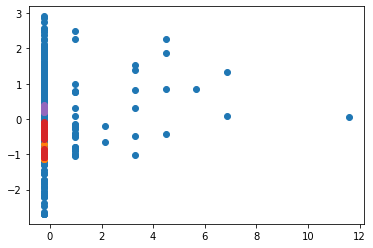

In [56]:
clusterval = df_std['Labels_DBSCAN'].unique()
for cluster in clusterval:
    plt.scatter(df_std[df_std['Labels_DBSCAN']==cluster]['SedentaryActiveDistance'], df_std[df_std['Labels_DBSCAN']==cluster]['Calories'])
plt.show()

{0, 1, -1}
{0, 1, -1}
{0, 1, -1}
{0, 1, -1}
{0, 1, -1}
{0, 1, -1}
{0, -1}
{0, 1, 2, -1}
[0.1, 0.12, 0.15, 0.18, 0.2, 0.3, 0.4, 0.5]
[3, 3, 3, 3, 3, 3, 2, 4]
[0.19382204188475155, 0.1971038450776736, 0.22251703078789212, 0.22251703078789212, 0.22251703078789212, 0.2266910481037538, 0.26636785777162464, 0.014231421876298871]


Text(0.5, 1.0, 'Silhouette Score for DBSCAN')

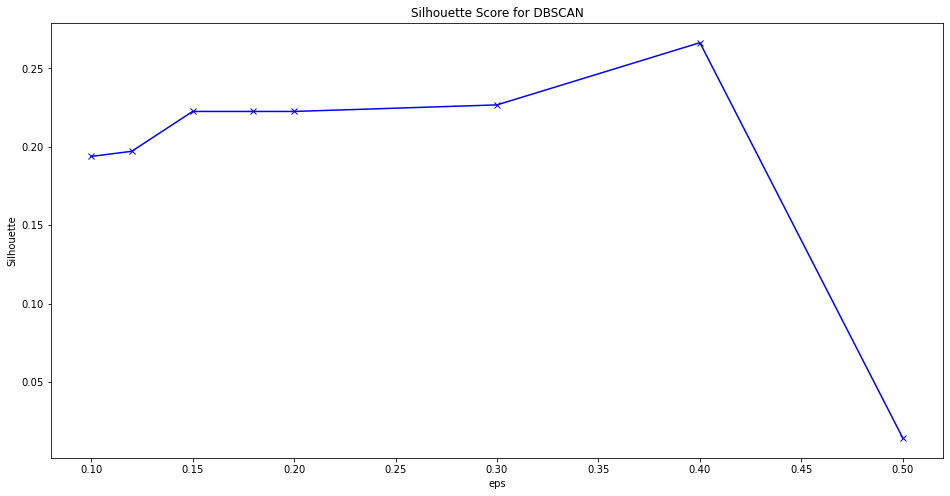

In [57]:
from sklearn.metrics import silhouette_score

eps_vector = [0.1, 0.12, 0.15, 0.18, 0.2, 0.3,  0.4, 0.5]
silhouette_dbs = []
n_clusters = []

for e in eps_vector:
    model = DBSCAN(eps = e, min_samples=10)
    clusters = set(model.fit_predict(df_std))
    n_clusters.append(len(clusters))
    print(clusters)
    model.fit(df_std)
    silhouette_dbs.append(silhouette_score(df_std, model.fit_predict(df_std)))

print(eps_vector)
print(n_clusters)
print(silhouette_dbs)
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,8))
plt.plot(eps_vector, silhouette_dbs, 'bx-')
plt.xlabel('eps')
plt.ylabel('Silhouette')
plt.title('Silhouette Score for DBSCAN')

### Agglomerative Clustering:

In [58]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3) 

In [59]:
### Make a Dendrogram:

from scipy.cluster.hierarchy import dendrogram, linkage

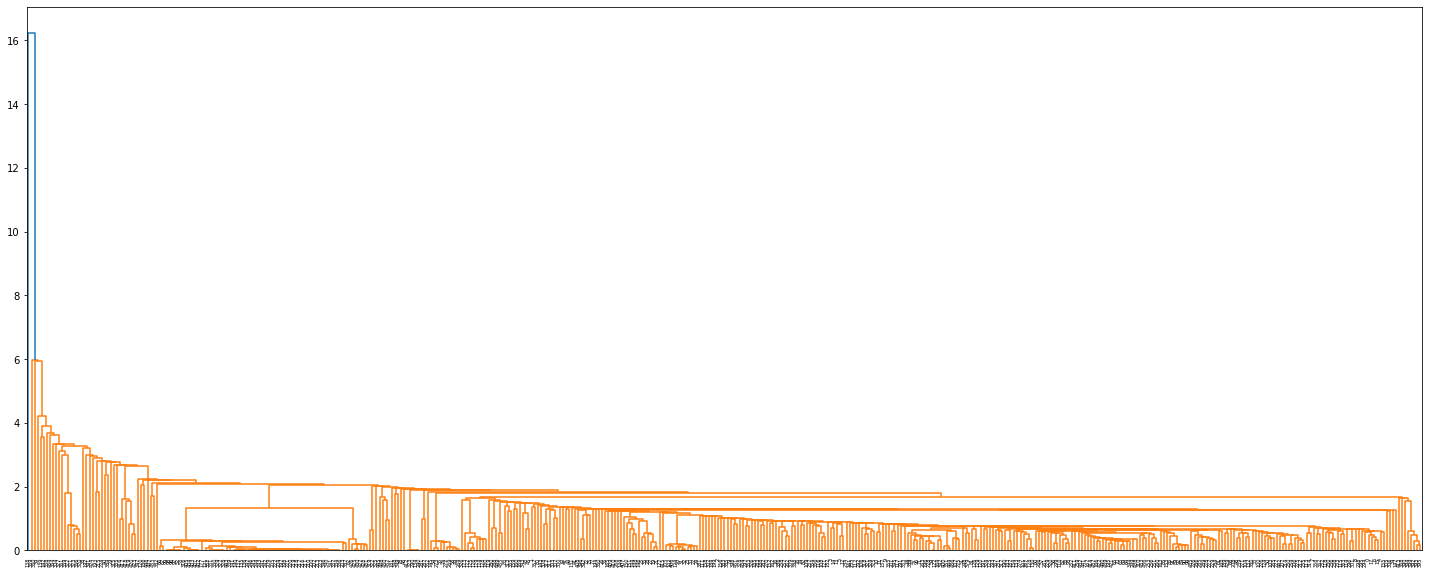

In [60]:
Z = linkage(df_std)
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

In [61]:
df_std.drop('Labels_DBSCAN', axis=1, inplace=True)

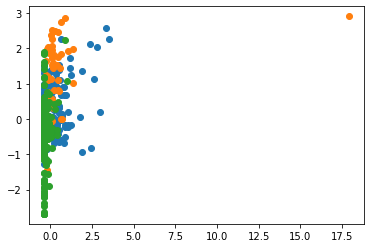

In [62]:
df_std['labels_hc'] = model.fit_predict(df_std)

clusterval = df_std['labels_hc'].unique()
for cluster in clusterval:
    plt.scatter(df_std[df_std['labels_hc']==cluster]['FairlyActiveMinutes'], df_std[df_std['labels_hc']==cluster]['Calories'])
plt.show()

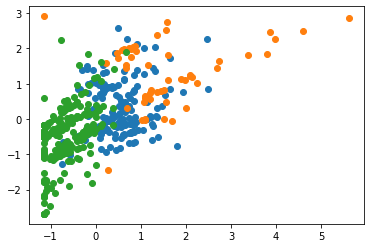

In [63]:
clusterval = df_std['labels_hc'].unique()
for cluster in clusterval:
    plt.scatter(df_std[df_std['labels_hc']==cluster]['TotalDistance'], df_std[df_std['labels_hc']==cluster]['Calories'])
plt.show()

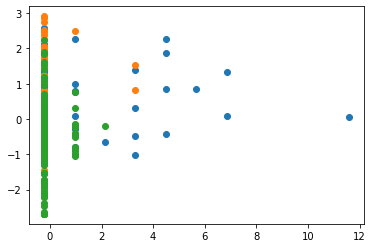

In [64]:
clusterval = df_std['labels_hc'].unique()
for cluster in clusterval:
    plt.scatter(df_std[df_std['labels_hc']==cluster]['SedentaryActiveDistance'], df_std[df_std['labels_hc']==cluster]['Calories'])
plt.show() 